# 实验四、水域分割

## 一、无标记水域分割

In [20]:
clear
close all
% origin image
origin_img = imread('cells.png');
% [a, b, channel] = size(origin_img)

% gradient image
hy = fspecial('sobel');
hx = hy';
Iy = imfilter(double(origin_img), hy, 'replicate');
Ix = imfilter(double(origin_img), hx, 'replicate');
gradmag = sqrt(Ix.^2 + Iy.^2);

% result
L = watershed(gradmag);
Lrgb = label2rgb(L);


a =

   234


b =

   280


channel =

     1




**API说明**：
1. $L = watershed(A)$：对输入矩阵$A$进行**分水岭变换**，得标签矩阵$L$。$L$中元素是非负整数,值为$0$的元素属于分水岭界限(watershed ridge line),值为$i(i\geq 1)$的元素属于第$i$个积水盆(catchment basin)。分水岭变换本质上是要把低海拔的积水盆地分离出来。


2. $label2rgb()$：转换标记矩阵到RGB图像(伪彩色图像)。


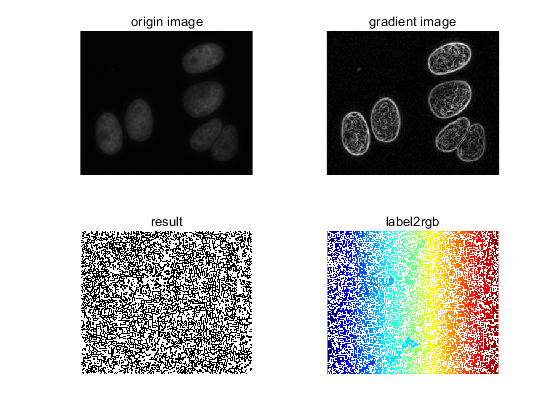

In [15]:
figure;
subplot(2,2,1),imshow(origin_img);title('origin image')
subplot(2,2,2),imshow(gradmag, []), title('gradient image')
subplot(2,2,3),imshow(L,[0,1]),title('result');
subplot(2,2,4), imshow(Lrgb), title('label2rgb')

**API说明**：

1. $imshow(I,[low, high])$： 用指定的灰度范围$[low,high]$显示灰度图像$I$。图像中灰度值$\leq low$的都将用黑色显示，而灰度值$\geq high$都显示白色，介于low和high之间的用其灰度级的默认值的中间色调显示。用了空矩阵imshow([])将使用$[min(I(:)), \ max(I(:))]$作为参数。


## 二、带标记水域分割

不带标记的watershed容易过分割，带上标记符可以引导算法分割。
1. 前景标记(也称为内部标记):对象内部连接的像素。
2. 背景标记(也称为外部标记):不属于任何对象的像素。
3. 利用前景、背景标记来改进梯度幅值矩阵(最小覆盖算法)，在改进的梯度矩阵上再进行分水岭变换。

## 2.1 前景标记构建

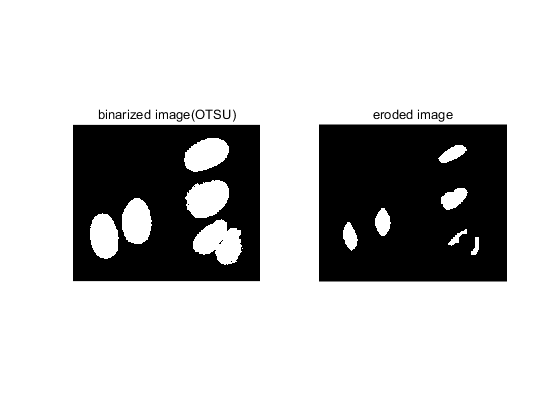

In [31]:
thresh = graythresh(origin_img);
bw = imbinarize(origin_img,thresh);
se = strel(ones(20,20));
%se = strel('disk',20);
eroded_image = imerode(bw, se);
figure;
subplot(121); imshow(bw); title('binarized image(OTSU)')
subplot(122); imshow(eroded_image); title('eroded image');

## 2.2 背景标记构建

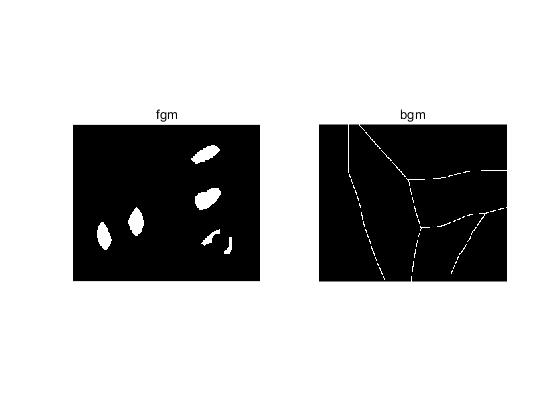

In [61]:
fgm = eroded_image;
D = bwdist(fgm);
D_ = watershed(D);
bgm = D_ == 0;
figure;
subplot(121);imshow(fgm);title('fgm');
subplot(122);imshow(bgm);title('bgm');

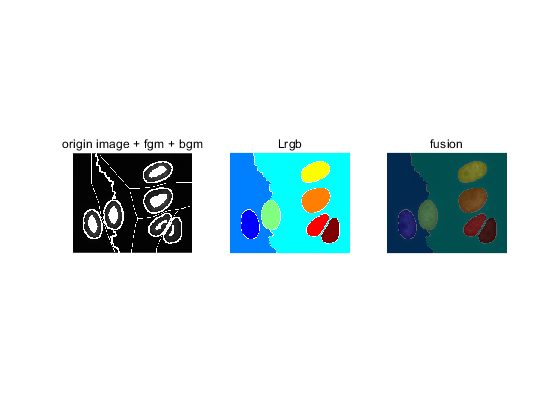

In [62]:
% smooth gradient image
gradmag2 = imimposemin(gradmag, bgm | fgm);

% draw
L = watershed(gradmag2);
I4 = origin_img;
I4(imdilate(L == 0, ones(3, 3)) | bgm | fgm) = 255;
figure; 
subplot(131); imshow(I4);title('origin image + fgm + bgm');

Lrgb = label2rgb(L);
subplot(132);imshow(Lrgb);title('Lrgb');

subplot(133);imshow(origin_img);title('fusion')
hold on
himage = imshow(Lrgb);
himage.AlphaData = 0.3;